In [231]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.linalg import sqrtm
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    LabelEncoder,
    OneHotEncoder,
    OrdinalEncoder,
)
from sklearn.linear_model import (
    LinearRegression,
    Lasso,
    Ridge,
    LassoCV,
    RidgeCV,
    LogisticRegression,
)
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer, KNNImputer



In [232]:
df = pd.read_csv("/ExamExercises/Datasets/stroke_data.csv")

In [233]:
df.head()

,Unnamed: 0,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,9046,Male,67.0,NaN,NaN,Yes,Private,Urban,228.69,36.6,NaN,1
1,1,51676,Female,61.0,0.0,0.0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,2,31112,Male,80.0,0.0,1.0,Yes,Private,Rural,105.92,32.5,never smoked,1
3,3,60182,Female,49.0,0.0,0.0,Yes,Private,Urban,171.23,34.4,smokes,1
4,4,1665,Female,79.0,1.0,0.0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [278]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         5110 non-null   int64  
 1   id                 5110 non-null   int64  
 2   gender             5110 non-null   object 
 3   age                5110 non-null   float64
 4   hypertension       4380 non-null   float64
 5   heart_disease      4716 non-null   float64
 6   ever_married       5110 non-null   object 
 7   work_type          5110 non-null   object 
 8   Residence_type     5110 non-null   object 
 9   avg_glucose_level  5110 non-null   float64
 10  bmi                4909 non-null   float64
 11  smoking_status     4599 non-null   object 
 12  stroke             5110 non-null   int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 519.1+ KB


In [236]:
df.drop(columns=["Unnamed: 0", "id"], inplace=True)

In [237]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,NaN,NaN,Yes,Private,Urban,228.69,36.6,NaN,1
1,Female,61.0,0.0,0.0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0.0,1.0,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0.0,0.0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1.0,0.0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [238]:
df["smoking_status"].value_counts()

smoking_status
never smoked       1708
Unknown            1377
formerly smoked     802
smokes              712
Name: count, dtype: int64

In [239]:
label_encoder = LabelEncoder()

In [240]:
df["gender"] = label_encoder.fit_transform(df["gender"])

In [241]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,NaN,NaN,Yes,Private,Urban,228.69,36.6,NaN,1
1,0,61.0,0.0,0.0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,1,80.0,0.0,1.0,Yes,Private,Rural,105.92,32.5,never smoked,1
3,0,49.0,0.0,0.0,Yes,Private,Urban,171.23,34.4,smokes,1
4,0,79.0,1.0,0.0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [242]:
df["smoking_status"].unique()

array([nan, 'never smoked', 'smokes', 'formerly smoked', 'Unknown'],
      dtype=object)

In [243]:
label_encoder.classes_

array(['Female', 'Male', 'Other'], dtype=object)

In [244]:
df["ever_married"] = label_encoder.fit_transform(df["ever_married"])

In [245]:
df["work_type"] = label_encoder.fit_transform(df["work_type"])

In [246]:
df["Residence_type"] = label_encoder.fit_transform(df["Residence_type"])

In [247]:
df.sample()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2880,0,79.0,0.0,1.0,1,2,0,201.38,31.1,NaN,0


In [248]:
df["smoking_status"] = label_encoder.fit_transform(df["smoking_status"])

In [249]:
label_encoder.classes_

array(['Unknown', 'formerly smoked', 'never smoked', 'smokes', nan],
      dtype=object)

In [250]:
df.loc[df["smoking_status"] == 4, "smoking_status"] = np.nan

In [251]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,NaN,NaN,1,2,1,228.69,36.6,NaN,1
1,0,61.0,0.0,0.0,1,3,0,202.21,NaN,2.0,1
2,1,80.0,0.0,1.0,1,2,0,105.92,32.5,2.0,1
3,0,49.0,0.0,0.0,1,2,1,171.23,34.4,3.0,1
4,0,79.0,1.0,0.0,1,3,0,174.12,24.0,2.0,1


In [252]:
median_imputer = SimpleImputer(strategy="median")

In [253]:
df.isnull().sum()

gender                 0
age                    0
hypertension         730
heart_disease        394
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status       511
stroke                 0
dtype: int64

<Axes: xlabel='bmi', ylabel='Count'>

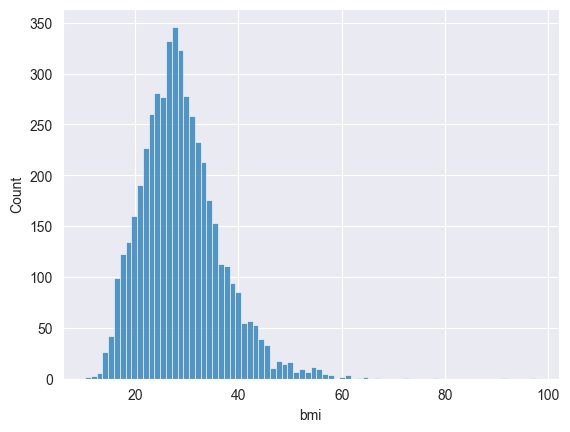

In [254]:
sns.histplot(df["bmi"])

In [255]:
df[["bmi"]] = median_imputer.fit_transform(df[["bmi"]])

In [256]:
df.isnull().sum()

gender                 0
age                    0
hypertension         730
heart_disease        394
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                    0
smoking_status       511
stroke                 0
dtype: int64

<Axes: xlabel='avg_glucose_level', ylabel='Count'>

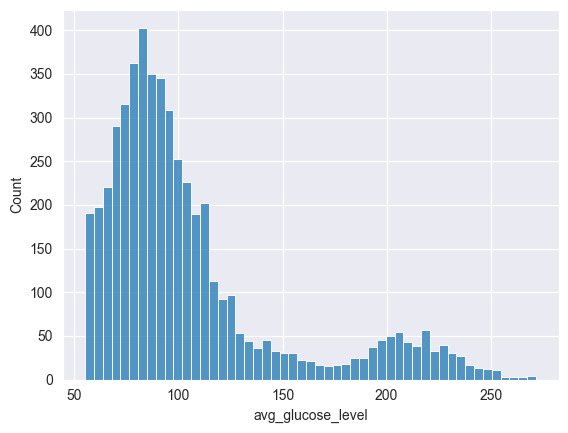

In [257]:
sns.histplot(df["avg_glucose_level"])

In [258]:
knn_imputer = KNNImputer(n_neighbors=21)

In [259]:
df[["smoking_status"]] = knn_imputer.fit_transform(df[["smoking_status"]])

In [260]:
df[["heart_disease"]] = knn_imputer.fit_transform(df[["heart_disease"]])

In [261]:
knn_imputer = KNNImputer(n_neighbors=31)

In [262]:
df[["hypertension"]] = knn_imputer.fit_transform(df[["hypertension"]])

In [263]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [264]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0.097945,0.054283,1,2,1,228.69,36.6,1.381605,1
1,0,61.0,0.000000,0.000000,1,3,0,202.21,28.1,2.000000,1
2,1,80.0,0.000000,1.000000,1,2,0,105.92,32.5,2.000000,1
3,0,49.0,0.000000,0.000000,1,2,1,171.23,34.4,3.000000,1
4,0,79.0,1.000000,0.000000,1,3,0,174.12,24.0,2.000000,1


In [265]:
X, y = df.drop(columns=["stroke"]), df["stroke"]

In [266]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [267]:
classifier = LogisticRegression().fit(train_X, train_y)

/Users/jovanvelichkoski/PycharmProjects/IntroToDataScience/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [268]:
pred_y = classifier.predict(test_X)

In [269]:
print("Accuracy:",metrics.accuracy_score(test_y, pred_y))
print(confusion_matrix(test_y, pred_y))
print(classification_report(test_y, pred_y))

Accuracy: 0.9403131115459883
[[960   0]
 [ 61   1]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       1.00      0.02      0.03        62

    accuracy                           0.94      1022
   macro avg       0.97      0.51      0.50      1022
weighted avg       0.94      0.94      0.91      1022



In [270]:
df["stroke"].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [271]:
new_df_stroke = df.loc[df["stroke"] == 1]
new_df_stroke

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0.097945,0.054283,1,2,1,228.69,36.6,1.381605,1
1,0,61.0,0.000000,0.000000,1,3,0,202.21,28.1,2.000000,1
2,1,80.0,0.000000,1.000000,1,2,0,105.92,32.5,2.000000,1
3,0,49.0,0.000000,0.000000,1,2,1,171.23,34.4,3.000000,1
4,0,79.0,1.000000,0.000000,1,3,0,174.12,24.0,2.000000,1
...,...,...,...,...,...,...,...,...,...,...,...
244,1,57.0,0.000000,0.000000,1,2,0,84.96,36.7,0.000000,1
245,0,14.0,0.097945,0.000000,0,4,0,57.93,30.9,0.000000,1
246,0,75.0,0.000000,0.000000,1,3,0,78.80,29.3,1.000000,1
247,1,71.0,1.000000,0.054283,1,3,0,87.80,28.1,0.000000,1


In [272]:
new_df_no_stroke = df.loc[df["stroke"] == 0]
new_df_no_stroke = new_df_no_stroke.sample(300)

In [273]:
new_df = pd.concat([new_df_stroke, new_df_no_stroke])
new_df = new_df.sample(frac=1)
new_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3223,0,47.0,0.000000,0.0,1,2,1,93.18,42.6,1.000000,0
1933,0,70.0,0.000000,0.0,1,2,1,91.25,36.0,0.000000,0
2112,1,13.0,0.000000,0.0,0,3,1,74.19,31.1,1.000000,0
28,1,69.0,0.097945,1.0,1,3,1,195.23,28.3,3.000000,1
2891,1,72.0,0.097945,1.0,1,2,1,99.76,27.1,1.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
19,1,57.0,0.000000,1.0,0,0,1,217.08,28.1,0.000000,1
1251,1,4.0,0.000000,0.0,0,4,0,103.76,15.9,0.000000,0
50,0,76.0,0.000000,0.0,0,2,1,89.96,28.1,1.381605,1
3187,1,24.0,0.000000,0.0,0,2,1,88.38,20.1,3.000000,0


In [274]:
new_df["stroke"].value_counts()

stroke
0    300
1    249
Name: count, dtype: int64

In [275]:
X, y = new_df.drop(columns=["stroke"]), new_df["stroke"]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [276]:
classifier = LogisticRegression().fit(train_X, train_y)
pred_y = classifier.predict(test_X)

/Users/jovanvelichkoski/PycharmProjects/IntroToDataScience/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [277]:
print("Accuracy:",metrics.accuracy_score(test_y, pred_y))
print(confusion_matrix(test_y, pred_y))
print(classification_report(test_y, pred_y))

Accuracy: 0.7272727272727273
[[45 16]
 [14 35]]
              precision    recall  f1-score   support

           0       0.76      0.74      0.75        61
           1       0.69      0.71      0.70        49

    accuracy                           0.73       110
   macro avg       0.72      0.73      0.72       110
weighted avg       0.73      0.73      0.73       110

